This notebook takes the csv and computes the reading grade level of the text report and writes it to the csv in a column called grade.

In [1]:
import pandas as pd 
from fkscore import fkscore
import matplotlib.pyplot as plt

In [2]:
data = 'Resources/current_data.csv'
df = pd.read_csv(data)
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df['grade'] = ''
df['readability'] = ''

In [4]:
text = df.iloc[0,0]
df.head()

,text,date_time,city,state,shape,duration,grade,readability
0,Translucent cylindrical silent aircraft Seen n...,10/6/20 14:40,Alexander,NC,Cylinder,10 seconds,,
1,Tonight around 11 pm i walked outside to see i...,3/20/19 23:00,Wright,AR,Disk,1 minute,,
2,4 triangular sightings with different light pa...,4/16/19 21:30,Titusville,FL,Triangle,30 minutes,,
3,Bright orange lights seen by a family of 4 in ...,4/16/19 21:30,Knoxville,IL,Light,08:00,,
4,MADAR Node 145,4/9/19 21:41,Norwood,NJ,NaN,NaN,,


In [5]:
f=fkscore(text)
print(f.stats)
print(f.score)

{'num_sentences': 4, 'num_words': 139, 'num_syllables': 200}
{'readability': 49.837, 'grade': 'College Level'}


In [6]:
for index,row in df.iterrows():
    try:
        text = str(df.loc[index,'text'])
        f=fkscore(text)

        df.loc[index,'grade'] = f.score['grade']
        df.loc[index,'readability'] = f.score['readability']
    except ZeroDivisionError:
        df.loc[index,'grade'] = 'Unknown'

In [7]:
df = df[['text','date_time','city','state','shape','duration','readability','grade']]
df.head()

,text,date_time,city,state,shape,duration,readability,grade
0,Translucent cylindrical silent aircraft Seen n...,10/6/20 14:40,Alexander,NC,Cylinder,10 seconds,49.837,College Level
1,Tonight around 11 pm i walked outside to see i...,3/20/19 23:00,Wright,AR,Disk,1 minute,92.07,5th Grade
2,4 triangular sightings with different light pa...,4/16/19 21:30,Titusville,FL,Triangle,30 minutes,77.359,7th Grade
3,Bright orange lights seen by a family of 4 in ...,4/16/19 21:30,Knoxville,IL,Light,08:00,77.378,7th Grade
4,MADAR Node 145,4/9/19 21:41,Norwood,NJ,NaN,NaN,90.99,5th Grade


In [8]:
#df.to_csv('Resources/dont_touch_me.csv')

In [9]:
df = df.dropna()
df.state.unique()

array(['NC', 'AR', 'FL', 'IL', 'CA', 'MS', 'IN', 'UT', 'IA', 'KY', 'RI',
       'MT', 'AZ', 'OK', 'NJ', 'SC', 'PA', 'MI', 'MO', 'OH', 'TX', 'OR',
       'MA', 'WY', 'NY', 'CT', 'ON', 'WA', 'QC', 'AB', 'AL', 'SD', 'TN',
       'MD', 'ME', 'VA', 'GA', 'MN', 'NV', 'WI', 'LA', 'ID', 'CO', 'BC',
       'NM', 'NH', 'WV', 'DC', 'NE', 'NB', 'KS', 'MB', 'NS', 'ND', 'AK',
       'SK', 'DE', 'NF', 'VT', 'SA', 'NT', 'HI', 'PR', 'PE', 'YT'],
      dtype=object)

In [10]:
canada_abbrev = ['AB','BC','MB','NB','NL','NT','NS','NU','ON','PE','QC','SK','YT','NF','SA']
indexes = []
for index,row in df.iterrows():
    if df.loc[index,'state'] in canada_abbrev:
        df = df.drop(index)




In [11]:
df = df[['state','readability']]
df['readability'] = df['readability'].astype(float)
df = df[df['readability'] >= 1]
df = df[df['readability'] <= 100]
df['readability'].mean()

76.78597528996471

In [12]:
df = df.set_index('state')

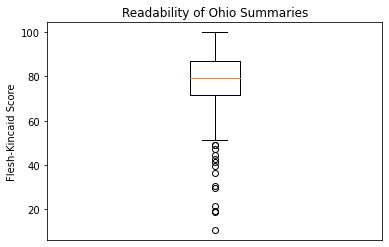

In [13]:
state_groups = df.groupby('state')
ohio_reading = state_groups.get_group('OH')
plt.boxplot(ohio_reading['readability'])
plt.title('Readability of Ohio Summaries')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.ylabel('Flesh-Kincaid Score')
plt.savefig('REsources/Presentation/ohio_readability.PNG')

In [14]:
wa_reading = state_groups.get_group('WA')
wa_reading.describe()

,readability
count,557.000000
mean,76.953467
std,13.990939
min,4.188000
25%,71.138000
50%,79.094000
75%,85.834000
max,99.625000


Text(0, 0.5, 'Flesh-Kincaid Score')

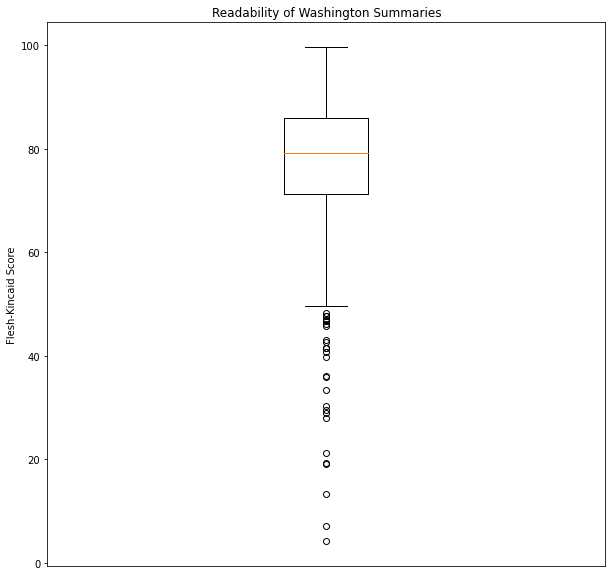

In [16]:
plt.figure(figsize=(10,10))
plt.boxplot(wa_reading['readability'])
plt.title('Readability of Washington Summaries')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.ylabel('Flesh-Kincaid Score')